# Trabalho 1
Matéria: Processamento de Linguagem Natural <br>
Dupla/Matrícula: Bianca Nunes Coelho - 15102880, Raíssa Nunes Coelho - 15102887 <br> 

## Introdução

Multi Class Classification <br>

## Bibliotecas
Bibliotecas do ptyhon utilizadas neste trabalho estão a seguir.

In [1]:
import pandas as pd
import re
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt

## Datasets
Datasets utilizados estão definidos a seguir.

In [2]:
file = "train-00000-of-00001-ecf072e7202447d8.parquet"
df = pd.read_parquet(file, engine= 'pyarrow')

In [3]:
len(df)

3877

In [4]:
df.head(4)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,"Após tempestade com ventos, São Paulo terá sáb...",Após uma tempestade com ventos de mais de 100 ...,https://www.cnnbrasil.com.br/nacional/apos-tem...,"Termômetros devem chegar a 26ºC, esquentando a...",nacional,2023-11-04 12:15:44
2,Como os aplicativos de relacionamento “arruina...,Jenny Nguyen-Don estava com vontade de comer f...,https://www.cnnbrasil.com.br/tecnologia/como-o...,Pessoas em busca de relacionamentos afirmam qu...,tecnologia,2023-11-04 12:15:07
3,Fluminense pode ser o 26º clube a levantar a t...,O Fluminense vai em busca do primeiro título d...,https://www.cnnbrasil.com.br/esportes/fluminen...,"Em busca do título inédito, o Tricolor carioca...",esportes,2023-11-04 12:05:24


## Balanceamento

In [5]:
df['categoria'].value_counts()

esportes           960
nacional           623
internacional      618
economia           562
politica           507
entretenimento     450
tecnologia          44
saude               41
noticias            38
lifestyle           21
branded-content     13
Name: categoria, dtype: int64

<AxesSubplot: >

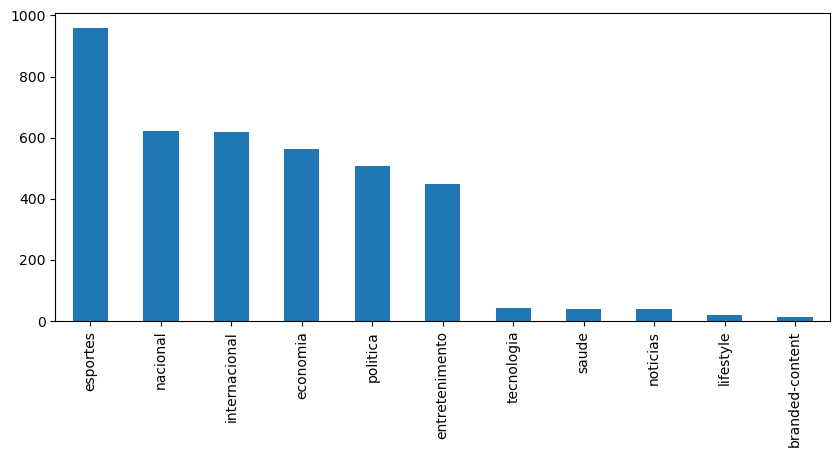

In [6]:
plt.figure(figsize=(10,4))
df.categoria.value_counts().plot(kind='bar')

In [7]:
indice_linha_remover = ['tecnologia',  'saude','noticias','lifestyle','branded-content']

In [8]:
df = df[~df['categoria'].isin(indice_linha_remover)]

In [9]:
df['categoria'].value_counts()

esportes          960
nacional          623
internacional     618
economia          562
politica          507
entretenimento    450
Name: categoria, dtype: int64

In [10]:
# Undersampling
min = df['categoria'].value_counts().min()

amostras = []

for i in df['categoria'].value_counts().index:
    a = df[df['categoria'] == i].sample(min, replace=False)
    amostras.append(a)

df_balanceado = pd.concat(amostras)

In [11]:
df_balanceado['categoria'].value_counts()

esportes          450
nacional          450
internacional     450
economia          450
politica          450
entretenimento    450
Name: categoria, dtype: int64

In [12]:
df_balanceado = df_balanceado.reset_index(drop=True)
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Mourinho pode recusar Arábia por Seleção Brasi...,Enquanto Carlo Ancelotti não confirma se vai m...,https://www.cnnbrasil.com.br/esportes/mourinho...,"Técnico português, José Mourinho tem contrato ...",esportes,2023-11-29 18:30:49
1,Taylor Swift curte “noitada” com namoradas de ...,"Namorada do tight end do Kansas City Chiefs, a...",https://www.cnnbrasil.com.br/esportes/taylor-s...,Registro da curtição do grupo foi publicado po...,esportes,2023-11-08 13:55:03
2,Neymar tem alta hospitalar após cirurgia no jo...,O atacante Neymar teve alta hospitalar neste s...,https://www.cnnbrasil.com.br/esportes/neymar-t...,"Atacante foi operado na quinta-feira (2), fico...",esportes,2023-11-04 18:04:03
3,Grêmio terá mais um desfalque contra o Atlétic...,O Grêmio ganhou mais uma preocupação para enfr...,https://www.cnnbrasil.com.br/esportes/gremio-t...,Tricolor tem três baixas no time titular para ...,esportes,2023-11-15 10:17:33
4,Petr Cech estreia como goleiro de hóquei no ge...,"O ex-goleiro Petr Cech, ídolo do Chelsea, estr...",https://www.cnnbrasil.com.br/esportes/petr-cec...,Ídolo do Chelsea jogou alguns minutos pela pri...,esportes,2023-11-27 22:00:07


In [13]:
# pega coluna
text = df_balanceado['texto']
len(text)

2700

In [14]:
categorias = ['esportes','nacional', 'internacional', 'economia', 'politica', 'entretenimento']

## Pré-processamento

In [15]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [16]:
from unidecode import unidecode

for i in range(len(text)):
    text[i] = unidecode(text[i])

In [17]:
for i in range(len(text)):
    text[i] = re.sub(r'[^a-zA-Z\s]', "" ,text[i])

In [18]:
print(text[0])

enquanto carlo ancelotti nao confirma se vai mesmo ocupar o cargo de treinador da selecao brasileira outro treinador estrangeiro estaria interessado na vaga de acordo com o tabloide britanico daily mirror o portugues jose mourinho atualmente na roma acompanha a situacao e estaria disposto a recusar propostas milionarias do futebol da arabia saudita por uma chance de treinar o brasil a partir de  aos  anos mourinho tem contrato com a roma ate o fim da temporada em junho do proximo ano e nao deve renovar o treinador chegou a equipe italiana apos decepcionante passagem pelo tottenham e seguidos anos em baixa no futebol europeu  leia mais  o portugues recuperou prestigio no ano passado depois de levar a roma a conquista da liga conferencia primeiro titulo continental do clube recentemente mourinho afirmou que carlo ancelotti e o treinador perfeito para o real madrid e que o italiano cometeria um erro se resolvesse deixar o cargo mesmo com a oferta para treinar a selecao brasileira em entre

### NLTK

In [19]:
token_text = []

for j in text:
    token_text.append(nltk.word_tokenize(j))

In [20]:
print(token_text[0])

['enquanto', 'carlo', 'ancelotti', 'nao', 'confirma', 'se', 'vai', 'mesmo', 'ocupar', 'o', 'cargo', 'de', 'treinador', 'da', 'selecao', 'brasileira', 'outro', 'treinador', 'estrangeiro', 'estaria', 'interessado', 'na', 'vaga', 'de', 'acordo', 'com', 'o', 'tabloide', 'britanico', 'daily', 'mirror', 'o', 'portugues', 'jose', 'mourinho', 'atualmente', 'na', 'roma', 'acompanha', 'a', 'situacao', 'e', 'estaria', 'disposto', 'a', 'recusar', 'propostas', 'milionarias', 'do', 'futebol', 'da', 'arabia', 'saudita', 'por', 'uma', 'chance', 'de', 'treinar', 'o', 'brasil', 'a', 'partir', 'de', 'aos', 'anos', 'mourinho', 'tem', 'contrato', 'com', 'a', 'roma', 'ate', 'o', 'fim', 'da', 'temporada', 'em', 'junho', 'do', 'proximo', 'ano', 'e', 'nao', 'deve', 'renovar', 'o', 'treinador', 'chegou', 'a', 'equipe', 'italiana', 'apos', 'decepcionante', 'passagem', 'pelo', 'tottenham', 'e', 'seguidos', 'anos', 'em', 'baixa', 'no', 'futebol', 'europeu', 'leia', 'mais', 'o', 'portugues', 'recuperou', 'prestigio

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hworld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

In [23]:
for stop in sw:
    for text in token_text:
        for t in text:
            if(t == stop):
                text.remove(t)

In [24]:
print(token_text[0])

['enquanto', 'carlo', 'ancelotti', 'nao', 'confirma', 'vai', 'ocupar', 'cargo', 'treinador', 'selecao', 'brasileira', 'outro', 'treinador', 'estrangeiro', 'estaria', 'interessado', 'vaga', 'acordo', 'tabloide', 'britanico', 'daily', 'mirror', 'portugues', 'jose', 'mourinho', 'atualmente', 'roma', 'acompanha', 'situacao', 'estaria', 'disposto', 'recusar', 'propostas', 'milionarias', 'futebol', 'arabia', 'saudita', 'chance', 'treinar', 'brasil', 'partir', 'anos', 'mourinho', 'contrato', 'roma', 'ate', 'fim', 'temporada', 'junho', 'proximo', 'ano', 'nao', 'deve', 'renovar', 'treinador', 'chegou', 'equipe', 'italiana', 'apos', 'decepcionante', 'passagem', 'tottenham', 'seguidos', 'anos', 'baixa', 'futebol', 'europeu', 'leia', 'portugues', 'recuperou', 'prestigio', 'ano', 'passado', 'levar', 'roma', 'conquista', 'liga', 'conferencia', 'primeiro', 'titulo', 'continental', 'clube', 'recentemente', 'mourinho', 'afirmou', 'carlo', 'ancelotti', 'treinador', 'perfeito', 'real', 'madrid', 'italian

In [25]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Mourinho pode recusar Arábia por Seleção Brasi...,"[enquanto, carlo, ancelotti, nao, confirma, va...",https://www.cnnbrasil.com.br/esportes/mourinho...,"Técnico português, José Mourinho tem contrato ...",esportes,2023-11-29 18:30:49
1,Taylor Swift curte “noitada” com namoradas de ...,"[namorada, tight, end, kansas, city, chiefs, p...",https://www.cnnbrasil.com.br/esportes/taylor-s...,Registro da curtição do grupo foi publicado po...,esportes,2023-11-08 13:55:03


## Análises

In [26]:
from collections import Counter  # Contagem de frequência de palavras usando NLTK 
frequencia_palavras = Counter(token_text[1]) 
print(frequencia_palavras.most_common())

[('chiefs', 5), ('taylor', 5), ('kansas', 4), ('tight', 3), ('end', 3), ('grupo', 3), ('mahomes', 3), ('travis', 3), ('city', 2), ('popstar', 2), ('esposas', 2), ('equipe', 2), ('cantora', 2), ('wags', 2), ('brittany', 2), ('buechele', 2), ('bell', 2), ('patrick', 2), ('quarterback', 2), ('duas', 2), ('jogos', 2), ('junto', 2), ('kelce', 2), ('meses', 2), ('dois', 2), ('namorada', 1), ('swift', 1), ('oficialmente', 1), ('membro', 1), ('squad', 1), ('namoradas', 1), ('jogadores', 1), ('nfl', 1), ('curtiu', 1), ('fim', 1), ('semana', 1), ('wifes', 1), ('and', 1), ('girlfriends', 1), ('composto', 1), ('paige', 1), ('lyndsay', 1), ('shane', 1), ('blake', 1), ('leia', 1), ('registro', 1), ('curticao', 1), ('publicado', 1), ('instagram', 1), ('fotos', 1), ('mostram', 1), ('amigas', 1), ('registros', 1), ('estao', 1), ('bebendo', 1), ('tacas', 1), ('champanhe', 1), ('esposa', 1), ('frequentado', 1), ('ja', 1), ('ate', 1), ('propria', 1), ('comemoracao', 1), ('marcam', 1), ('touchdown', 1), ('

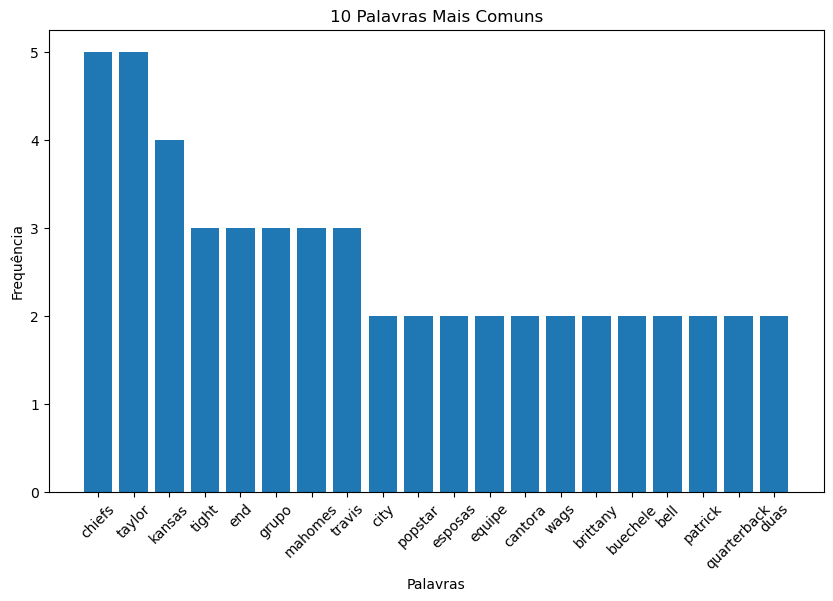

In [27]:
# Obter os 10 tokens mais comuns e suas contagens
tokens_mais_comuns = frequencia_palavras.most_common(20)
palavras, contagens = zip(*tokens_mais_comuns)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

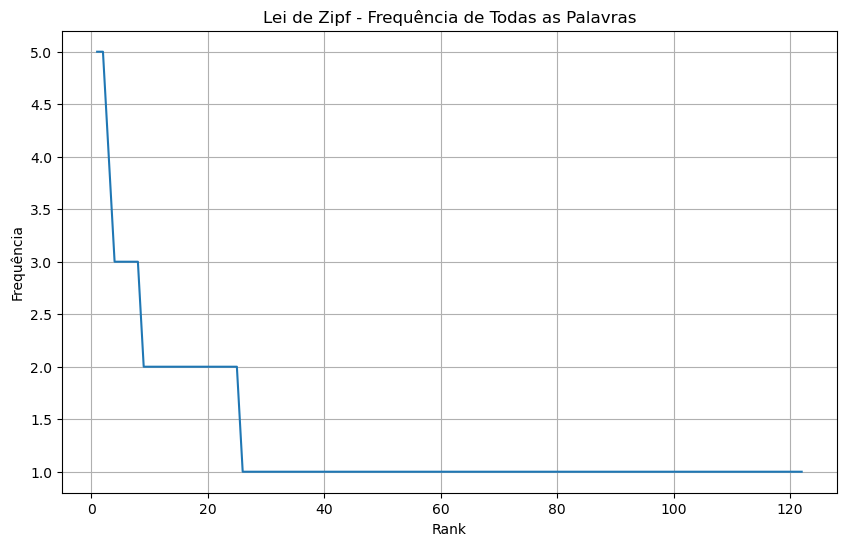

In [28]:
palavras_ordenadas = sorted(frequencia_palavras.items(), key=lambda x: x[1], reverse=True)
palavras, contagens = zip(*palavras_ordenadas)

# Plotar o gráfico da Lei de Zipf
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(palavras) + 1), contagens)
plt.xlabel('Rank')
plt.ylabel('Frequência')
plt.title('Lei de Zipf - Frequência de Todas as Palavras')
plt.grid(True)
plt.show()

## Prediction
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

In [29]:
for i in range(len(token_text)):
    token_text[i] = " ".join(token_text[i])
print(token_text[0])

enquanto carlo ancelotti nao confirma vai ocupar cargo treinador selecao brasileira outro treinador estrangeiro estaria interessado vaga acordo tabloide britanico daily mirror portugues jose mourinho atualmente roma acompanha situacao estaria disposto recusar propostas milionarias futebol arabia saudita chance treinar brasil partir anos mourinho contrato roma ate fim temporada junho proximo ano nao deve renovar treinador chegou equipe italiana apos decepcionante passagem tottenham seguidos anos baixa futebol europeu leia portugues recuperou prestigio ano passado levar roma conquista liga conferencia primeiro titulo continental clube recentemente mourinho afirmou carlo ancelotti treinador perfeito real madrid italiano cometeria erro resolvesse deixar cargo oferta treinar selecao brasileira entrevista canal rai italia portugues afirmou somente louco deixaria clube espanhol relembrou vez decidiu sair equipe merengue acho somente maluco pode deixar real madrid clube queira sai queriam fica

In [32]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Mourinho pode recusar Arábia por Seleção Brasi...,enquanto carlo ancelotti nao confirma vai ocup...,https://www.cnnbrasil.com.br/esportes/mourinho...,"Técnico português, José Mourinho tem contrato ...",esportes,2023-11-29 18:30:49
1,Taylor Swift curte “noitada” com namoradas de ...,namorada tight end kansas city chiefs popstar ...,https://www.cnnbrasil.com.br/esportes/taylor-s...,Registro da curtição do grupo foi publicado po...,esportes,2023-11-08 13:55:03


In [34]:
## Bag of Words model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=sw)
features = tfidf.fit_transform(df_balanceado.texto).toarray()
labels = df_balanceado.categoria
features.shape

(2700, 19927)

In [53]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for categoria, index in sorted(df_balanceado.items()):
  features_chi2 = chi2(features, labels == index)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(categoria))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'categoria':
  . Most correlated unigrams:
. elogiado
. email
  . Most correlated bigrams:
. elizeta ramos
. zul rio
# 'data_hora':
  . Most correlated unigrams:
. elogiado
. email
  . Most correlated bigrams:
. elizeta ramos
. zul rio
# 'link':
  . Most correlated unigrams:
. elogiado
. email
  . Most correlated bigrams:
. elizeta ramos
. zul rio
# 'resumo':
  . Most correlated unigrams:
. elogiado
. email
  . Most correlated bigrams:
. elizeta ramos
. zul rio
# 'texto':
  . Most correlated unigrams:
. elogiado
. email
  . Most correlated bigrams:
. elizeta ramos
. zul rio
# 'titulo':
  . Most correlated unigrams:
. elogiado
. email
  . Most correlated bigrams:
. elizeta ramos
. zul rio
